<header>
Homework # 2 
====================================
</header>
Alec Blankenship

9/21/2015

# 1 - Determine Phase portrait
## 1A - By finding the potential function
The potential function is found below
$$\ddot{u}+u-\frac{\lambda}{a-u} = 0$$
$$f(u) = u-\frac{\lambda}{a-u}$$
$$\int\dot{u}\ddot{u}dt+\int f(u)\dot{u}dt=h$$
since
$$\dot{u} = \frac{du}{dt} , \ddot{u}=\frac{d\dot{u}}{dt}$$
$$\int\dot{u}d\dot{u}+\int f(u)du=h$$
$$\frac{1}{2}\dot{u}^{2}+\frac{u^{2}}{2}+\lambda ln(a-u) = h$$
"kinetic Energy" = $\frac{1}{2}\dot{u}^{2}$

"Potential Energy" = $\frac{u^{2}}{2}+\lambda ln(a-u)$

"Total Mechanical Energy" = $h$

Note, the kinetic energy is a function of $\dot{u}$ and the potential energy  is a function of $u$. By plotting the function as a contour plot where $\dot{u}$ is the y axis, $u$ is the x axis, and the mechanical energy (h) is the z axis a phase portrait can be found where the behavior of the system is characterized. Lambda and a are the parameters that can be changed to give different system behaviors. 

The phase plots for different paramters a and $\lambda$ are discussed below and provided in the following cell

The parameters a and $\lambda$ can be manipulated to give different system behaviors. By setting $\ddot{u}=0$ in the initial equation, the equillibrium points can be determined by finding the roots of the resulting quadradic equation. There will be three different equillibrium cases corresponding to the following conditions:
### condition 1
$a^{2}-4\lambda>0$,--> 2 real roots, 2 equillibrium points

In this phase portrait, there are two possible equillibrium points that can be reached depending on the initial conditions. The first is characterized by the eliptical orbit and the other characterized by the asymptotic behavior to the right of the first equilibrium point. 
### condition 2
$a^{2}-4\lambda=0$,--> 1 real roots, 1 equillibrium points

In this phase portrait, there is only one equillibrium point as shown in the portrait. Depending on the initial condition, the system will follow a unchanging trajectory.

### condition 3
$a^{2}-4\lambda<0$ --> 2 complex roots, 0 equillibrium points

In this phase portrait, there are no equillibrium points. For any given initial condition, the system solution will move toward positive or negative infinity depending on where the initial conditions are on the phase portrait.

## B - Numerically

For the numerical solution, the origional second order ODE will be solved numberically to produce trajectories. All three cases are presented below. 



Populating the interactive namespace from numpy and matplotlib
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


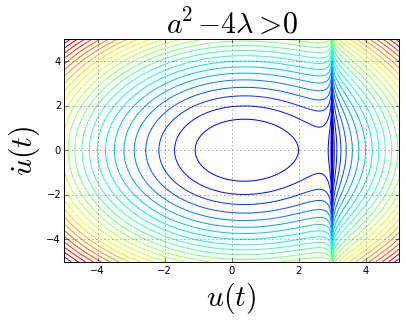

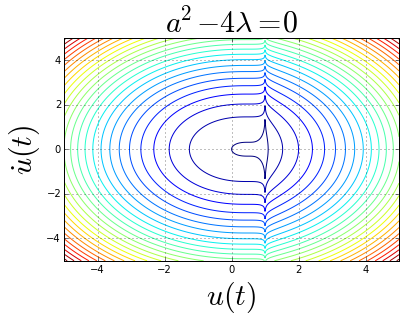

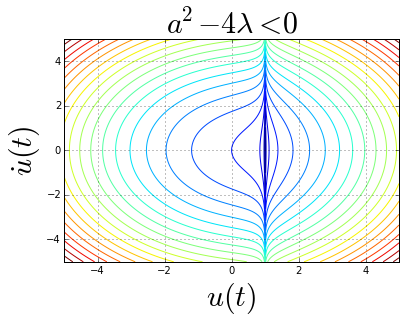

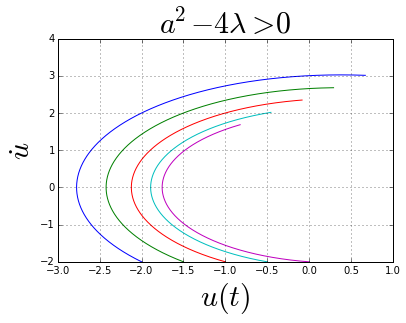

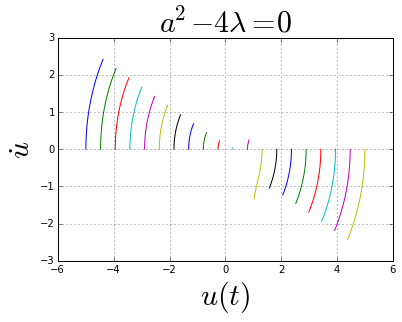

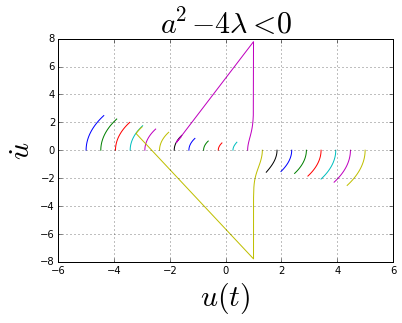

In [16]:
%pylab inline
LAMBDA = 4
A = 4
"""
Creating Phase Plot
"""
def MechanicalFunction(u = np.asarray([1,2]),number=1):
    if number == 1:
        LAMBDA = 1
        A = 3
    elif number ==2:
        LAMBDA = 1/4
        A = 1
    elif number ==3:
        LAMBDA = 1
        A = 1
    potential = (1/2)* (u[0, :]**2) + LAMBDA*np.log(np.abs(A - u[0, :] ) )
    kinetic = (1/2)*(u[1, :]**2)
    return potential+kinetic

numx = 1000
numv = 1000
u1all = np.linspace(-5, 5, numx)
u2all = np.linspace(-5, 5, numv)
u1, u2 = np.meshgrid(u1all, u2all)
u1.shape = (numx*numv,1)
u2.shape = (numx*numv,1)
u = np.asarray([u1,u2])

mechanicalEnergy1 = MechanicalFunction(u=u ,number=1)
mechanicalEnergy2 = MechanicalFunction(u=u ,number=2)
mechanicalEnergy3 = MechanicalFunction(u=u ,number=3)

u1 = u1.reshape(numx, numx)
u2 = u2.reshape(numx, numx)
mechanicalEnergy1 = mechanicalEnergy1.reshape(numx, numx)
plt.figure()
plt.xlabel('$u(t)$', fontsize=30)
plt.ylabel('$\dot u(t)$', fontsize=30)
plt.grid()
plt.title("$a^{2}-4\lambda>0$",fontsize = 30)
plt.contour(u1, u2, mechanicalEnergy1,30)
mechanicalEnergy2 = mechanicalEnergy2.reshape(numx, numx)
plt.figure()
plt.xlabel('$u(t)$', fontsize=30)
plt.ylabel('$\dot u(t)$', fontsize=30)
plt.title("$a^{2}-4\lambda=0$",fontsize = 30)
plt.grid()
plt.contour(u1, u2, mechanicalEnergy2,30)
mechanicalEnergy3 = mechanicalEnergy3.reshape(numx, numx)
plt.figure()
plt.xlabel('$u(t)$', fontsize=30)
plt.ylabel('$\dot u(t)$', fontsize=30)
plt.title("$a^{2}-4\lambda<0$",fontsize = 30)
plt.grid()
plt.contour(u1, u2, mechanicalEnergy3,30)

"""Numerical Solution"""
import scipy as sp
from scipy.integrate import odeint
def solve_ode(max_time=1.0, Lambda = .1, x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, a = 1, plotnow = 1, T = "Title"):

    def duff_deriv(x1_x2, t, a = a, Lambda = Lambda):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -x1+Lambda/(a-x1)]

    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.integrate.odeint(duff_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            plt.plot(x, v)
        plt.grid('on')
        plt.xlabel('$u(t)$', fontsize=30)
        plt.ylabel("$\dot{u}$", fontsize=30)
        plt.title(T,fontsize = 30)
    # Just in case we want to pull and plot.
    return t, x_t

# Make a grid of starting points
numx = 5
numv = 5
x0 = np.linspace(-5, 5, 20)
v0= np.linspace(0,0, 20)
x0 = np.array([x0]).T
v0 = np.array([v0]).T
x01 = np.linspace(-2, 0, numx)
v01= np.linspace(-2,-2, numv)
x01 = np.array([x01]).T
v01 = np.array([v01]).T
_,_ = solve_ode(max_time=2.47, Lambda = 1, x0 = x01, v0 = v01, a = 3,T = "$a^{2}-4\lambda>0$")
_,_ = solve_ode(max_time=0.5, Lambda = 0.25, x0 = x0, v0 = v0, a = 1,T = "$a^{2}-4\lambda=0$")
_,_ = solve_ode(max_time=0.5, Lambda = 1, x0 = x0, v0 = v0, a = 1,T = "$a^{2}-4\lambda<0$")


# 2 - Find Phase Portraits

## 2.A

$$\ddot{x}+x+x^3=0$$

State Space Representation

$$\ddot{x_1} = x_2$$
$$\ddot{x_2} = -x_1-x_1^{3}$$

phase portrait: Plotting trajectories of the state space representation shows each initial condition in the range between -1.5 and 1.5 for both $x$ and $\dot{x}$ gives uniqeu orbits that behave with lyapunov stability

## 2.B
$$\ddot{x}+x-x^3=0$$

State Space Representation

$$\ddot{x_1} = x_2$$
$$\ddot{x_2} = -x_1+x_1^{3}$$
phase portrait: In the range of $\dot{x}$ = {-0.7,0.7} and $x$ = {-1,1} the system is stable with trajectories in constant orbits. However outside of this range, the system becomes unstable. This was found through trial and error. 

## 2.C
$$\ddot{x}-x+x^3=0$$

State Space Representation

$$\ddot{x_1} = x_2$$
$$\ddot{x_2} = +x_1-x_1^{3}$$
phase portrait: The phase portrait shows lyapunov stability, the trajectories orbit in an irregular shape. As the initial conditions approach the equillibrium points, the trajectories become closer and closer together into a "figure 8' shape orbital

## 2.D
$$\ddot{x}-x-x^3=0$$

State Space Representation

$$\ddot{x_1} = x_2$$
$$\ddot{x_2} = +x_1+x_1^{3}$$
phase portrait: The trajectories for this phase portrait are similar to the protrait for problem 2A except a slightly different orbit shape. exhibits lyapunov stability

## 2.D
$$\ddot{x}+x^3=0$$

State Space Representation

$$\ddot{x_1} = x_2$$
$$\ddot{x_2} = -x_1^{3}$$
phase portrait: Same as 2C



Populating the interactive namespace from numpy and matplotlib


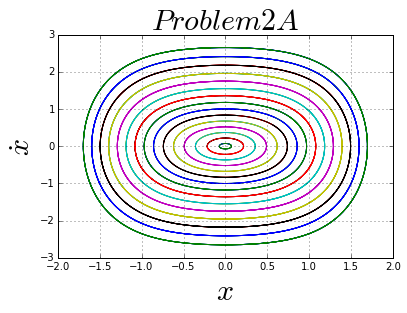

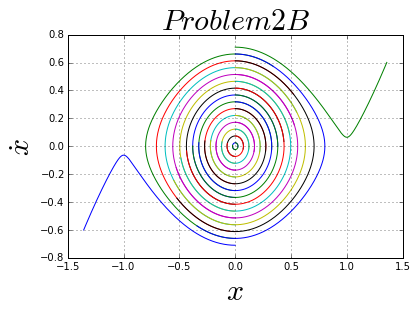

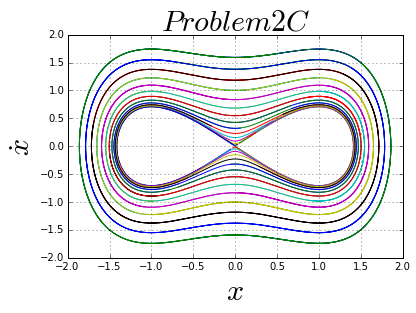

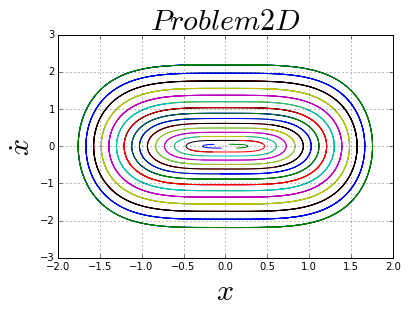

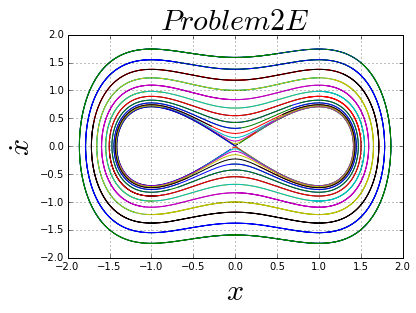

In [14]:

import scipy as sp
from scipy.integrate import odeint

def Equation(max_time=10, x0 = np.array([[1,1,-1,-1]]).T, v0 = np.array([[1,-1,1,-1]]).T, eq = 1):

    if eq==1:
        strin = '$Problem 2A$'
        def sdof_2(x1_x2, t):
            x1, x2 = x1_x2
            return [x2, -x1-x1**3]
    elif eq==2:
        strin = '$Problem 2B$'
        def sdof_2(x1_x2, t):
            x1, x2 = x1_x2
            return [x2, -x1+x1**3]
    elif eq==3:
        strin = '$Problem 2C$'
        def sdof_2(x1_x2, t):
            x1, x2 = x1_x2
            return [x2, +x1-x1**3]
    elif eq==4:
        strin = '$Problem 2D$'
        def sdof_2(x1_x2, t):
            x1, x2 = x1_x2
            return [x2, -x1**3]
    elif eq==5:
        strin = '$Problem 2E$'
        def sdof_2(x1_x2, t):
            x1, x2 = x1_x2
            return [x2, +x1-x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.integrate.odeint(sdof_2, x0i, t)
                      for x0i in x0])
    plt.figure()
    for i in range(N):
        x, v = x_t[i,:,:].T
        plt.plot(x, v)
    plt.title(strin,fontsize = 30)
    plt.xlabel('$x$',fontsize = 30)
    plt.ylabel('$\dot{x}$', fontsize = 30)
    plt.grid()
    return t, x_t
num = 30
x0 = np.linspace(-1.5,1.5,num)
v0 = np.linspace(-1.5,1.5,num)
x0 = np.array([x0]).T
v0 = np.array([v0]).T
v02 = np.linspace(-0.71,0.71,num)
x02 = np.linspace(0,0,num)
x02 = np.array([x02]).T
v02 = np.array([v02]).T

_, _ = Equation(x0 = x0, v0 = v0,eq = 1)
_, _ = Equation(max_time = 5, x0 = x02, v0 = v02,eq = 2)
_, _ = Equation(x0 = x0, v0 = v0,eq = 3)
_, _ = Equation(x0 = x0, v0 = v0,eq = 4)
_, _ = Equation(x0 = x0, v0 = v0,eq = 5)
plt.show()


# 3 - Determine when the following sets are dissipative and when they are conservative

$$\dot{x} = \sigma(y-x)$$
$$\dot{y} = \rho x - y - x z$$
$$\dot{z} = -\beta z + x y$$
    
The set of equations is dissipative when

$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}<0$$

and conservative when

$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}=0$$

for the equations given,

$$\frac{\partial\dot{x}}{\partial x}+\frac{\partial\dot{y}}{\partial y}+\frac{\partial\dot{z}}{\partial z}=-(\sigma+1+\beta)$$

Plotted in the cell below is a dissipative and conservative case. 

For the dissipative case, $\sigma = 1$ and $\beta = 1$. i.e.
$$\frac{\partial\dot{x}}{\partial x}+\frac{\partial\dot{y}}{\partial y}+\frac{\partial\dot{z}}{\partial z}=-3$$

For the conservative case, $\sigma = 1$ and $\beta = -2$. i.e.
$$\frac{\partial\dot{x}}{\partial x}+\frac{\partial\dot{y}}{\partial y}+\frac{\partial\dot{z}}{\partial z}=0$$

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


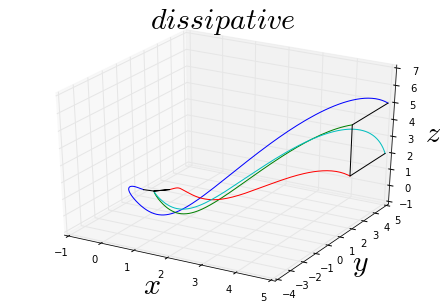

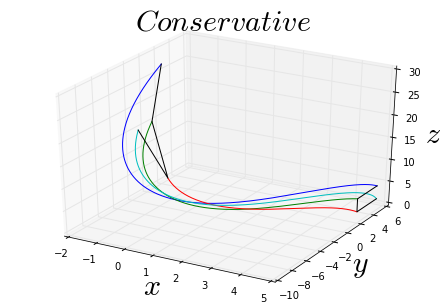

In [5]:
%pylab inline
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def solve_ode(max_time=1.0,x0 = np.array([[-1,-1]]).T, y0 = np.array([[1, 1]]).T, z0 = np.array([[1, 1]]).T, Sigma = 1, roh = 1, beta = 1, plotnow = 1,m = 1):

    def Lorenz_deriv(xyz, t, Sigma=Sigma, roh=roh, beta=beta):
        """Compute the time-derivative of a SDOF system."""
        x, y, z = xyz
        return [Sigma*(y-x),roh*x-y-x*z,-beta*z+x*y]

    x0 = np.concatenate((x0, y0, z0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([sp.integrate.odeint(Lorenz_deriv, x0i, t)
                      for x0i in x0])
    if m == 1:
        titl = '$dissipative$'
    elif m== 2:
        titl = '$Conservative$'
    if plotnow == 1:
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1], projection='3d');
        for i in range(N):
            x, y, z = x_t[i,:].T

            plt.plot(x, y, z)
        plt.grid('on',fontsize = 30)
        plt.xlabel('$x$',fontsize = 30);
        plt.ylabel('$y$', fontsize = 30);
        plt.title(titl,fontsize=30)
        ax.set_zlabel('$z$',fontsize = 30);
    # Just in case we want to pull and plot.
    return t, x_t
# Make a grid of starting points
number = 5
x0 = [5,5,5,5]
y0 = [5,2,2,5]
z0 = [5,5,2,2]
x0 = np.array([x0]).T
y0 = np.array([y0]).T
z0 = np.array([z0]).T
t,x_t= solve_ode(max_time=10,x0 = x0, y0 = y0,z0 = z0, Sigma = 1, beta = 1, m=1)
plt.plot(x_t[:,0,0],x_t[:,0,1],x_t[:,0,2],'k-')
plt.plot(x_t[:,len(t)-1,0],x_t[:,len(t)-1,1],x_t[:,len(t)-1,2],'k-');
t,x_t= solve_ode(max_time=1,x0 = x0, y0 = y0,z0 = z0, Sigma = 1, beta = -2, m=2)
plt.plot(x_t[:,0,0],x_t[:,0,1],x_t[:,0,2],'k-')
plt.plot(x_t[:,len(t)-1,0],x_t[:,len(t)-1,1],x_t[:,len(t)-1,2],'k-');

# 4 - Determine when the following sets are dissipative and when they are conservative

$$\dot{x} = -(y+z)$$
$$\dot{y} = x + a y$$
$$\dot{z} = b + (x - c) z$$

as in number 3, the following relationship should be solved for in order to determine whether the system is dissipative or conservative

$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}$$

From the origional equations...

$$\frac{\partial\dot{x}}{\partial x}+\frac{\partial\dot{y}}{\partial y}+\frac{\partial\dot{z}}{\partial z}=a+x-c$$

if a and c are constants, lets say $a=0.5$ and $c=5$ the system is dissipative when $x<4.5$, the system is conservative when $x=4.5$ and if $x$ exceeds 4.5 the system exhibits expansion

Plotted below


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


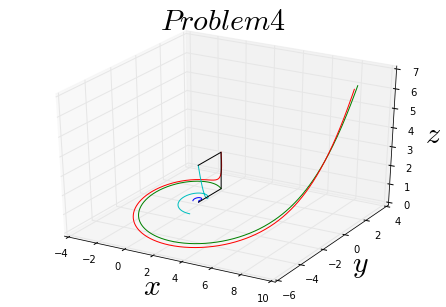

In [8]:
%pylab inline
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def solve_ode(max_time=1.0,x0 = np.array([[-1,-1]]).T, y0 = np.array([[1, 1]]).T, z0 = np.array([[1, 1]]).T, a = 1, b = 1, c = 1, plotnow = 1):

    def Rossler_deriv(xyz, t, a=a, b=b,c=c):
        """Compute the time-derivative of a SDOF system."""
        x, y, z = xyz
        return [-(y-z),x+a*y,b+(x-c)*z]

    x0 = np.concatenate((x0, y0, z0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([sp.integrate.odeint(Rossler_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1], projection='3d');
        for i in range(N):
            x, y, z = x_t[i,:].T

            plt.plot(x, y, z)
        plt.grid('on')
        plt.xlabel('$x$',fontsize=30);
        plt.ylabel('$y$',fontsize=30);
        plt.title('$Problem 4$',fontsize=30)
        ax.set_zlabel('$z$',fontsize=30);
    # Just in case we want to pull and plot.
    return t, x_t
# Make a grid of starting points
number = 5
x0 = [0,0,0,0]
y0 = [0,2,2,0]
z0 = [0,0,2,2]
x0 = np.array([x0]).T
y0 = np.array([y0]).T
z0 = np.array([z0]).T
t,x_t= solve_ode(max_time=5.5,x0 = x0, y0 = y0,z0 = z0,a=0.5, b=0.5, c=5)
plt.plot(x_t[:,0,0],x_t[:,0,1],x_t[:,0,2],'k-')

# 5 - Considering the following 2D map, when is the system dissipative?

$$x_{n+1} = a_{11}x_n+a_{12}y_n$$
$$y_{n+1} = a_{21}x_n+a_{22}y_n$$

When this map is discrete time system is plotted, dissipation looks to occur when all of the constants ($a_11$,$a_12$,$a_21$,and $a_22$) are $<1$. If any of the constants are $>1$ the system is no longer dissipative. This is shown in the following cell.

[  5.00000000e+00   1.65000000e+00   6.72500000e-01   3.05125000e-01
   1.44531250e-01   6.95353125e-02   3.36354531e-02   1.63002195e-02
   7.90430645e-03   3.83378163e-03   1.85961354e-03   9.02046272e-04
   4.37560993e-04   2.12250944e-04   1.02958234e-04   4.99427767e-05
   2.42261461e-05   1.17515728e-05   5.70043065e-06   2.76515410e-06]
[  4.00000000e+00   2.60000000e+00   1.37000000e+00   6.82500000e-01
   3.34025000e-01   1.62516250e-01   7.89135625e-02   3.82925156e-02
   1.85770502e-02   9.01168135e-03   4.37142887e-03   2.12049425e-03
   1.02860696e-03   4.98954981e-04   2.42032181e-04   1.17404519e-04
   5.69503631e-05   2.76253744e-05   1.34004643e-05   6.50027187e-06]


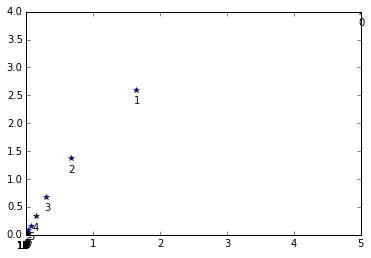

[  5.00000000e+00   1.04000000e+01   2.10600000e+01   4.24320000e+01
   8.54100000e+01   1.71887040e+02   3.45909096e+02   6.96109939e+02
   1.40085476e+03   2.81908567e+03   5.67313889e+03   1.14166465e+04
   2.29749033e+04   4.62347837e+04   9.30430562e+04   1.87240204e+05
   3.76802905e+05   7.58279613e+05   1.52596481e+06   3.07085744e+06]
[  4.00000000e+00   2.60000000e+00   3.12000000e+00   5.46000000e+00
   1.06704000e+01   2.13501600e+01   4.29174720e+01   8.63488080e+01
   1.73761511e+02   3.49675556e+02   7.03687356e+02   1.41610272e+03
   2.84977039e+03   5.73488882e+03   1.15409123e+04   2.32249762e+04
   4.67380312e+04   9.40557935e+04   1.89278240e+05   3.80904257e+05]


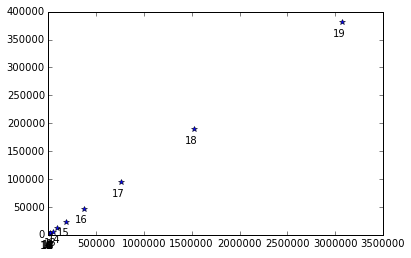

In [11]:
def solve_5(a_11 = 1, a_12 = 1, a_21 = 1, a_22 = 1, firstindex=0, numsteps=20,x0=5,y0=4):
    x = np.zeros(numsteps)
    y = np.zeros(numsteps)
    x[firstindex]=x0
    y[firstindex]=y0

    def system(x,y,a_11 = a_11, a_12 = a_12, a_21 = a_21, a_22 = a_22):
        return[x*a_11+y*a_12,x*a_21+y*a_22]

    for i in range(firstindex+1,numsteps):
        x[i],y[i] = system(x[i-1],y[i-1])
    print(x)
    print(y)
    plt.figure()
    plt.plot(x,y,'*')
    for i in range(numsteps):
        plt.annotate('{}'.format(i + firstindex), xy=(x[i],y[i]), xytext=(3, -14), ha='right',textcoords='offset points')
    plt.show()
"""Here, all constants are less than 1"""
solve_5(a_11 = 0.25, a_12 = 0.1, a_21 = 0.2, a_22 = 0.4)
"""Here, only one constant (a_11) is greater than 1 resulting in a non dissipative system"""
solve_5(a_11 = 2, a_12 = 0.1, a_21 = 0.2, a_22 = 0.4)